In [8]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations

In [ ]:
df = gpd.read_file('dataframes/reseau_cyclable.geojson') # bike lanes info from official website

In [4]:
df.columns

Index(['ID_CYCL', 'ID_TRC', 'AFFICHEUR_DYNAMIQUE', 'AVANCEMENT_CODE',
       'AVANCEMENT_DESC', 'COMPTEUR_CYLISTE', 'LONGUEUR', 'NBR_VOIE',
       'NOM_ARR_VILLE_CODE', 'NOM_ARR_VILLE_DESC', 'PROTEGE_4S',
       'REV_AVANCEMENT_CODE', 'REV_AVANCEMENT_DESC', 'ROUTE_VERTE', 'SAISONS4',
       'SAS_VELO', 'SEPARATEUR_CODE', 'SEPARATEUR_DESC', 'TYPE_VOIE_CODE',
       'TYPE_VOIE_DESC', 'TYPE_VOIE2_CODE', 'TYPE_VOIE2_DESC', 'VILLE_MTL',
       'geometry'],
      dtype='object')

In [5]:
df.head()

,ID_CYCL,ID_TRC,AFFICHEUR_DYNAMIQUE,AVANCEMENT_CODE,AVANCEMENT_DESC,COMPTEUR_CYLISTE,LONGUEUR,NBR_VOIE,NOM_ARR_VILLE_CODE,NOM_ARR_VILLE_DESC,...,SAISONS4,SAS_VELO,SEPARATEUR_CODE,SEPARATEUR_DESC,TYPE_VOIE_CODE,TYPE_VOIE_DESC,TYPE_VOIE2_CODE,TYPE_VOIE2_DESC,VILLE_MTL,geometry
0,27156,0,Non,E,Voie cyclable existante,Non,142,2,VM,Ville-Marie,...,Non,Non,None,None,5,Piste cyclable en site propre,1,Par défaut - Dans le sens de la circulation,Oui,"LINESTRING (-73.55209 45.49279, -73.55212 45.4..."
1,26855,0,Non,E,Voie cyclable existante,Non,295,2,LR,Saint-Laurent,...,Non,Non,None,None,7,Sentier polyvalent,1,Par défaut - Dans le sens de la circulation,Oui,"LINESTRING (-73.77200 45.49720, -73.77198 45.4..."
2,27798,0,Non,E,Voie cyclable existante,Non,701,2,VS,Villeray–Saint-Michel–Parc-Extension,...,Non,Non,None,None,7,Sentier polyvalent,1,Par défaut - Dans le sens de la circulation,Oui,"LINESTRING (-73.62559 45.56705, -73.62557 45.5..."
3,27607,0,Non,E,Voie cyclable existante,Non,63,2,KL,Kirkland,...,Non,Non,None,None,5,Piste cyclable en site propre,1,Par défaut - Dans le sens de la circulation,Non,"LINESTRING (-73.88344 45.44963, -73.88350 45.4..."
4,27593,0,Non,E,Voie cyclable existante,Non,76,2,DO,Dollard-des-Ormeaux,...,Non,Non,None,None,5,Piste cyclable en site propre,1,Par défaut - Dans le sens de la circulation,Non,"LINESTRING (-73.78976 45.49050, -73.78975 45.4..."


In [6]:
df['NOM_ARR_VILLE_DESC'].value_counts() # different districts (need to look more into this)

Mercier–Hochelaga-Maisonneuve               784
Rivière-des-Prairies–Pointe-aux-Trembles    767
Saint-Laurent                               632
Rosemont–La Petite-Patrie                   591
Pierrefonds-Roxboro                         543
Le Plateau-Mont-Royal                       540
Ville-Marie                                 526
Ahuntsic-Cartierville                       526
Le Sud-Ouest                                480
Verdun                                      403
Côte-des-Neiges–Notre-Dame-de-Grâce         352
Villeray–Saint-Michel–Parc-Extension        337
L'Île-Bizard–Sainte-Geneviève               280
LaSalle                                     248
Lachine                                     231
Montréal-Nord                               215
Anjou                                       210
Beaconsfield                                208
Pointe-Claire                               168
Saint-Léonard                               162
Dollard-des-Ormeaux                     

In [7]:
len(df['NOM_ARR_VILLE_DESC'].value_counts())

32

In [9]:
# Specify the name of the city
city_name = "Montreal"

# Retrieve the administrative boundary polygons for the sectors
sectors = ox.geometries_from_place(f"{city_name}, Canada", tags={'boundary': 'administrative', 'admin_level': '10'})


/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_22683/4026112225.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  sectors = ox.geometries_from_place(f"{city_name}, Canada", tags={'boundary': 'administrative', 'admin_level': '10'})


In [19]:
sectors.index # multi index dataframe

MultiIndex([(     'way', 21274088),
            (     'way', 21274089),
            (     'way', 21278622),
            (     'way', 21312916),
            (     'way', 22820810),
            (     'way', 22821423),
            (     'way', 22821428),
            (     'way', 22821429),
            (     'way', 22821430),
            (     'way', 22821432),
            ...
            ('relation',  8803540),
            ('relation',  8803553),
            ('relation',  8805426),
            ('relation',  8805573),
            ('relation',  8805747),
            ('relation',  8806186),
            ('relation',  8806187),
            ('relation',  8806364),
            ('relation',  8806483),
            ('relation', 15936032)],
           names=['element_type', 'osmid'], length=307)

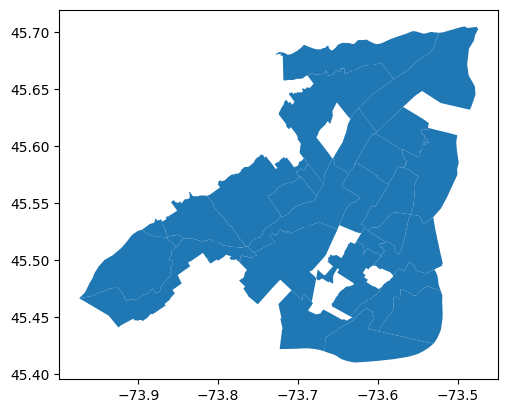

In [10]:
suburb_rows = sectors[sectors['place'] == 'suburb'] # retrieving rows classified as 'suburbs' - might be inaccurate as this is osmnx data
suburb_rows.plot();

In [11]:
suburb_rows['name'].value_counts()

Ville-Marie                                 1
Montréal-Nord                               1
Pierrefonds-Roxboro                         1
Côte-des-Neiges–Notre-Dame-de-Grâce         1
Saint-Laurent                               1
Le Sud-Ouest                                1
Verdun                                      1
LaSalle                                     1
Outremont                                   1
Rosemont–La Petite-Patrie                   1
Saint-Léonard                               1
Villeray–Saint-Michel–Parc-Extension        1
Ahuntsic-Cartierville                       1
Mercier–Hochelaga-Maisonneuve               1
Le Plateau-Mont-Royal                       1
Anjou                                       1
Rivière-des-Prairies–Pointe-aux-Trembles    1
Sainte-Dorothée                             1
Chomedey                                    1
Laval-des-Rapides                           1
Pont-Viau                                   1
Duvernay                          

In [12]:
len(suburb_rows['name'].value_counts())

27

In [14]:
if 'relation' in sectors.index.get_level_values('element_type'):  # rows where element_type index is relation
    relation_rows = sectors.loc[sectors.index.get_level_values('element_type') == 'relation']

In [15]:
relation_rows['name'].value_counts()

Westmount                                1
Sainte-Catherine                         1
Marguerite-D'Youville                    1
Montérégie                               1
Laurentides                              1
                                        ..
Pointe-Calumet                           1
Les Moulins                              1
Terrebonne                               1
L'Assomption (MRC)                       1
Communauté métropolitaine de Montréal    1
Name: name, Length: 65, dtype: int64

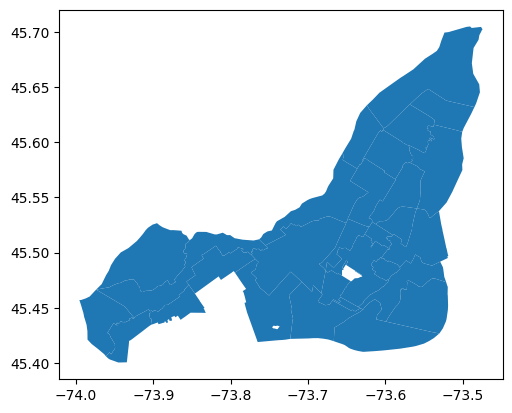

In [16]:
districts_list = df['NOM_ARR_VILLE_DESC'].value_counts().index.tolist()
districts = sectors[sectors['name'].isin(districts_list)]
districts.plot();

In [17]:
districts

name  \
element_type osmid                                               
relation     197561                                  Westmount   
             197562                                     Dorval   
             197567                                 Mont-Royal   
             197577                                   Kirkland   
             197580                    Sainte-Anne-de-Bellevue   
             197583                                 Senneville   
             197601                        Dollard-des-Ormeaux   
             1572820                               Ville-Marie   
             1634159                              Montréal-Est   
             1878503                     Le Plateau-Mont-Royal   
             5361655                            Côte-Saint-Luc   
             5363262                                   Lachine   
             7022381                            Montréal-Ouest   
             8802299  Rivière-des-Prairies–Pointe-aux-Trembles   
             8803286                                     Anjou   
             8803356             Mercier–Hochelaga-Maisonneuve   
             8803462                             Montréal-Nord   
             8803535                     Ahuntsic-Cartierville   
             8803536      Villeray–Saint-Michel–Parc-Extension   
             8803537                             Saint-Léonard   
             8803540                 Rosemont–La Petite-Patrie   
             8803553                                 Outremont   
             8805426                                   LaSalle   
             8805573                                    Verdun   
             8805747                              Le Sud-Ouest   
             8806186                             Saint-Laurent   
             8806187       Côte-des-Neiges–Notre-Dame-de-Grâce   
             8806364                       Pierrefonds-Roxboro   
             8806483             L'Île-Bizard–Sainte-Geneviève   

                                                               geometry  \
element_type osmid                                                        
relation     197561   POLYGON ((-73.61813 45.48927, -73.61779 45.489...   
             197562   POLYGON ((-73.79306 45.48254, -73.78964 45.484...   
             197567   POLYGON ((-73.68564 45.48976, -73.68539 45.489...   
             197577   POLYGON ((-73.90452 45.44676, -73.90231 45.447...   
             197580   POLYGON ((-73.96147 45.40604, -73.95803 45.408...   
             197583   POLYGON ((-73.99276 45.45033, -73.99301 45.450...   
             197601   POLYGON ((-73.85685 45.47389, -73.84940 45.477...   
             1572820  POLYGON ((-73.60666 45.49530, -73.60653 45.495...   
             1634159  POLYGON ((-73.56834 45.63422, -73.56815 45.634...   
             1878503  POLYGON ((-73.61246 45.52572, -73.61095 45.526...   
             5361655  MULTIPOLYGON (((-73.68281 45.46318, -73.67721 ...   
             5363262  POLYGON ((-73.72299 45.42178, -73.72008 45.438...   
             7022381  POLYGON ((-73.66819 45.45655, -73.66793 45.456...   
             8802299  POLYGON ((-73.62383 45.63343, -73.61620 45.638...   
             8803286  POLYGON ((-73.60309 45.61114, -73.60167 45.611...   
             8803356  POLYGON ((-73.56970 45.59664, -73.56942 45.597...   
             8803462  POLYGON ((-73.65568 45.58973, -73.65112 45.595...   
             8803535  POLYGON ((-73.76344 45.51199, -73.76070 45.513...   
             8803536  POLYGON ((-73.64831 45.53058, -73.64871 45.530...   
             8803537  POLYGON ((-73.62963 45.58382, -73.61657 45.599...   
             8803540  POLYGON ((-73.62152 45.53112, -73.62093 45.531...   
             8803553  POLYGON ((-73.62672 45.51658, -73.62615 45.517...   
             8805426  POLYGON ((-73.66667 45.41970, -73.66601 45.428...   
             8805573  POLYGON ((-73.59924 45.43743, -73.59901 45.437...   
             8805747  POLYGON ((-73.63515 45.45074, -73.63480